# Part I - Pisa data exploration
## by Tatjana Damdinshaw

## Introduction
PISA is a survey that already took place the 5th time in 2012 to assess the competencies in reading, mathematics and science (focus on mathematics) of 15 year-old students in 65 countries and economies. This dataset contains the information for each student. 


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re

%matplotlib inline

In [3]:
#Load dataset
df = pd.read_csv('pisa2012.csv', low_memory = False)

In [195]:
df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [196]:
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 636 columns):
 #    Column       Dtype  
---   ------       -----  
 0    Unnamed: 0   int64  
 1    CNT          object 
 2    SUBNATIO     int64  
 3    STRATUM      object 
 4    OECD         object 
 5    NC           object 
 6    SCHOOLID     int64  
 7    STIDSTD      int64  
 8    ST01Q01      int64  
 9    ST02Q01      float64
 10   ST03Q01      int64  
 11   ST03Q02      int64  
 12   ST04Q01      object 
 13   ST05Q01      object 
 14   ST06Q01      float64
 15   ST07Q01      object 
 16   ST07Q02      object 
 17   ST07Q03      object 
 18   ST08Q01      object 
 19   ST09Q01      object 
 20   ST115Q01     float64
 21   ST11Q01      object 
 22   ST11Q02      object 
 23   ST11Q03      object 
 24   ST11Q04      object 
 25   ST11Q05      object 
 26   ST11Q06      object 
 27   ST13Q01      object 
 28   ST14Q01      object 
 29   ST14Q02      object 
 30   ST14Q03      objec

In [197]:
print(df.shape)
print(df.dtypes.head(30))

(485490, 636)
Unnamed: 0      int64
CNT            object
SUBNATIO        int64
STRATUM        object
OECD           object
NC             object
SCHOOLID        int64
STIDSTD         int64
ST01Q01         int64
ST02Q01       float64
ST03Q01         int64
ST03Q02         int64
ST04Q01        object
ST05Q01        object
ST06Q01       float64
ST07Q01        object
ST07Q02        object
ST07Q03        object
ST08Q01        object
ST09Q01        object
ST115Q01      float64
ST11Q01        object
ST11Q02        object
ST11Q03        object
ST11Q04        object
ST11Q05        object
ST11Q06        object
ST13Q01        object
ST14Q01        object
ST14Q02        object
dtype: object


In [198]:
df.describe()

,Unnamed: 0,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,...,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,485490.000000,4.854900e+05,485490.000000,485490.000000,485490.000000,485438.000000,485490.000000,485490.000000,457994.000000,479269.000000,...,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,242745.500000,4.315457e+06,240.152197,6134.066201,9.813323,2.579260,6.558512,1996.070061,6.148963,1.265356,...,50.844201,51.020378,50.943149,50.685275,51.019842,50.540724,50.721164,40.013920,1.531189,0.140054
std,140149.035431,2.524434e+06,278.563016,6733.144944,3.734726,2.694013,3.705244,0.255250,0.970693,0.578992,...,120.684726,122.946533,121.170883,119.267686,122.981541,119.479516,119.799018,22.951264,0.539759,0.137864
min,1.000000,8.000000e+04,1.000000,1.000000,7.000000,1.000000,1.000000,1996.000000,4.000000,1.000000,...,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,1.000000,1.000000,0.000500
25%,121373.250000,2.030000e+06,61.000000,1811.000000,9.000000,1.000000,4.000000,1996.000000,6.000000,1.000000,...,4.660300,4.664800,4.643100,4.667000,4.675200,4.651850,4.660300,20.000000,1.000000,0.037800
50%,242745.500000,4.100000e+06,136.000000,3740.000000,10.000000,1.000000,7.000000,1996.000000,6.000000,1.000000,...,13.637700,13.698900,13.611700,13.672100,13.731100,13.582000,13.600200,40.000000,2.000000,0.145200
75%,364117.750000,6.880000e+06,291.000000,7456.000000,10.000000,3.000000,9.000000,1996.000000,7.000000,1.000000,...,41.233500,41.512500,41.695200,41.097300,41.189600,41.290925,41.356000,60.000000,2.000000,0.199900
max,485490.000000,8.580000e+06,1471.000000,33806.000000,96.000000,25.000000,99.000000,1997.000000,16.000000,4.000000,...,2476.566800,4155.283000,3743.450100,3232.163700,3904.868100,3607.478300,3412.174100,80.000000,3.000000,5.095500


In [5]:
#Filter columns by math work ethics
pattern = re.compile(r'st42', re.IGNORECASE)
columns = df.filter(regex=pattern)
columns

,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10
0,Agree,Disagree,Agree,Agree,Agree,Agree,Agree,Disagree,Disagree,Disagree
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Strongly agree,Disagree,Agree,Agree,Disagree,Strongly agree,Disagree,Agree,Agree
4,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Disagree,Disagree,Disagree,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...
485485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485486,Agree,Disagree,Disagree,Agree,Disagree,Agree,Agree,Disagree,Agree,Disagree
485487,Agree,Disagree,Disagree,Agree,Disagree,Agree,Disagree,Agree,Disagree,Agree
485488,Disagree,Disagree,Strongly disagree,Disagree,Disagree,Agree,Agree,Disagree,Disagree,Strongly agree


In [200]:
df['ST04Q01'].value_counts()

Female    245064
Male      240426
Name: ST04Q01, dtype: int64

In [201]:
#Get different values for one column
columns['ST46Q01'].value_counts()

Agree                148211
Strongly agree        77022
Disagree              70473
Strongly disagree     18192
Name: ST46Q01, dtype: int64

In [4]:
ordinal_var_dict = {'ST42Q01': ['Strongly agree','Agree','Disagree','Strongly disagree'], 
                   'ST42Q03': ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   'ST42Q05': ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   'ST42Q08': ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   'ST42Q10': ['Strongly agree','Agree','Disagree','Strongly disagree']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [203]:
pattern = re.compile(r'W_', re.IGNORECASE)
columns = df.filter(regex=pattern)
columns

,W_FSTUWT,W_FSTR1,W_FSTR2,W_FSTR3,W_FSTR4,W_FSTR5,W_FSTR6,W_FSTR7,W_FSTR8,W_FSTR9,...,W_FSTR71,W_FSTR72,W_FSTR73,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80
0,8.9096,13.1249,13.0829,4.5315,13.0829,13.9235,13.1249,13.1249,4.3389,4.3313,...,13.0829,13.9235,4.3389,4.3313,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829
1,8.9096,13.1249,13.0829,4.5315,13.0829,13.9235,13.1249,13.1249,4.3389,4.3313,...,13.0829,13.9235,4.3389,4.3313,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829
2,8.4871,12.7307,12.7307,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,4.2436,...,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307
3,8.4871,12.7307,12.7307,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,4.2436,...,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307
4,8.4871,12.7307,12.7307,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,4.2436,...,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485485,62.4825,93.7238,31.2413,93.7238,31.2413,31.2413,93.7238,93.7238,31.2413,31.2413,...,31.2413,93.7238,31.2413,93.7238,31.2413,93.7238,93.7238,93.7238,93.7238,31.2413
485486,65.7647,96.0036,33.9163,96.0036,33.9163,33.9163,96.0036,96.0036,33.9163,33.9163,...,33.9163,96.0036,33.9163,96.0036,33.9163,96.0036,96.0036,96.0036,96.0036,33.9163
485487,65.7647,96.0036,33.9163,96.0036,33.9163,33.9163,96.0036,96.0036,33.9163,33.9163,...,33.9163,96.0036,33.9163,96.0036,33.9163,96.0036,96.0036,96.0036,96.0036,33.9163
485488,65.7647,96.0036,33.9163,96.0036,33.9163,33.9163,96.0036,96.0036,33.9163,33.9163,...,33.9163,96.0036,33.9163,96.0036,33.9163,96.0036,96.0036,96.0036,96.0036,33.9163


In [204]:
df['ANXMAT'].isna().sum()

170726

In [205]:
df['ANXMAT']

0         0.32
1          NaN
2          NaN
3         0.31
4         1.02
          ... 
485485     NaN
485486   -0.20
485487    0.32
485488   -0.20
485489     NaN
Name: ANXMAT, Length: 485490, dtype: float64

For the visualization and anserwing the following questions the mathematics and total score for each student needs to be determined by calculating the mean of plausible values for the math section. The total score is determined by calculating the mean of all plausible values. 

In [6]:
#Determine math score
math_pattern = re.compile(r'PV\dMA', re.IGNORECASE)
math_columns = df.filter(regex=math_pattern)
math_mean = math_columns.mean(axis = 1)
print(math_columns)
print(math_mean)

         PV1MATH   PV2MATH   PV3MATH   PV4MATH   PV5MATH   PV1MACC   PV2MACC  \
0       406.8469  376.4683  344.5319  321.1637  381.9209  325.8374  324.2795   
1       486.1427  464.3325  453.4273  472.9008  476.0165  325.6816  419.9330   
2       533.2684  481.0796  489.6479  490.4269  533.2684  611.1622  486.5322   
3       412.2215  498.6836  415.3373  466.7472  454.2842  538.4094  511.9255   
4       381.9209  328.1742  403.7311  418.5309  395.1628  373.3525  293.1220   
...          ...       ...       ...       ...       ...       ...       ...   
485485  477.1849  493.5426  479.5217  486.5322  494.3215  507.5635  480.3007   
485486  518.9360  515.8202  505.6940  596.8297  508.8098  592.1561  491.6732   
485487  475.2376  482.2480  507.9530  457.3220  508.7319  557.8050  453.4273   
485488  550.9503  517.4560  529.1401  515.8981  501.0983  574.3184  554.0661   
485489  470.0187  441.1980  475.4713  441.9769  443.5348  467.6819  444.3138   

         PV3MACC   PV4MACC   PV5MACC  .

In [8]:
#Add mean math score to data frame
df['math_score'] = math_mean

In [208]:
df.tail()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU,math_score
485485,485486,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4955,10,3.0,...,93.7238,93.7238,93.7238,93.7238,31.2413,41,1,0.0653,22NOV13,482.754318
485486,485487,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4956,10,3.0,...,96.0036,96.0036,96.0036,96.0036,33.9163,41,1,0.0688,22NOV13,527.075863
485487,485488,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4957,10,3.0,...,96.0036,96.0036,96.0036,96.0036,33.9163,41,1,0.0688,22NOV13,489.063728
485488,485489,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4958,10,3.0,...,96.0036,96.0036,96.0036,96.0036,33.9163,41,1,0.0688,22NOV13,526.355352
485489,485490,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4959,10,3.0,...,93.7238,93.7238,93.7238,93.7238,31.2413,41,1,0.0653,22NOV13,424.509273


In [9]:
#Determine total score
total_pattern = re.compile(r'PV', re.IGNORECASE)
total_columns = df.filter(regex=total_pattern)
total_mean = total_columns.mean(axis = 1)
print(total_columns)
print(total_mean)

         PV1MATH   PV2MATH   PV3MATH   PV4MATH   PV5MATH   PV1MACC   PV2MACC  \
0       406.8469  376.4683  344.5319  321.1637  381.9209  325.8374  324.2795   
1       486.1427  464.3325  453.4273  472.9008  476.0165  325.6816  419.9330   
2       533.2684  481.0796  489.6479  490.4269  533.2684  611.1622  486.5322   
3       412.2215  498.6836  415.3373  466.7472  454.2842  538.4094  511.9255   
4       381.9209  328.1742  403.7311  418.5309  395.1628  373.3525  293.1220   
...          ...       ...       ...       ...       ...       ...       ...   
485485  477.1849  493.5426  479.5217  486.5322  494.3215  507.5635  480.3007   
485486  518.9360  515.8202  505.6940  596.8297  508.8098  592.1561  491.6732   
485487  475.2376  482.2480  507.9530  457.3220  508.7319  557.8050  453.4273   
485488  550.9503  517.4560  529.1401  515.8981  501.0983  574.3184  554.0661   
485489  470.0187  441.1980  475.4713  441.9769  443.5348  467.6819  444.3138   

         PV3MACC   PV4MACC   PV5MACC  .

In [10]:
#Add total score to data frame
df['total_score'] = total_mean

In [211]:
df.tail()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU,math_score,total_score
485485,485486,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4955,10,3.0,...,93.7238,93.7238,93.7238,31.2413,41,1,0.0653,22NOV13,482.754318,487.096410
485486,485487,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4956,10,3.0,...,96.0036,96.0036,96.0036,33.9163,41,1,0.0688,22NOV13,527.075863,522.822568
485487,485488,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4957,10,3.0,...,96.0036,96.0036,96.0036,33.9163,41,1,0.0688,22NOV13,489.063728,493.067276
485488,485489,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4958,10,3.0,...,96.0036,96.0036,96.0036,33.9163,41,1,0.0688,22NOV13,526.355352,525.598850
485489,485490,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4959,10,3.0,...,93.7238,93.7238,93.7238,31.2413,41,1,0.0653,22NOV13,424.509273,437.768810


### What is the structure of your dataset?

There are 485490 student PISA results with 636 features. Most of the features are answers to survey questions answered by the participating students and are ordered factor variables with Agree, Strongly agree, Disagree, Strongly disagree or a numeric scale. Numeric variables are the resulting score in the different categories. 

### What is/are the main feature(s) of interest in your dataset?

The influence of math anxiety and out-of-school learning hours towards the math PISA score in general and per gender.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that students with a high anxiety towards math score lower in math. I also expect students which put a lot of effort into learning hours outside of school score higher in total. 

## Univariate Exploration


I start inspecting the distribution of the main variable of interest the math and total score. 

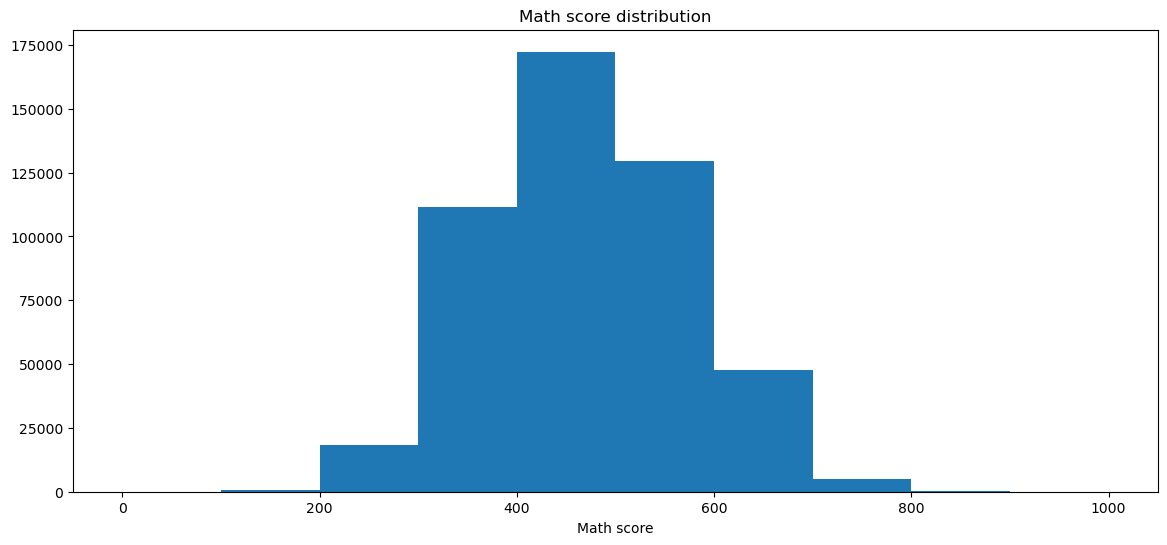

In [11]:
#Math score
plt.figure(figsize=[14, 6])
bins = np.arange(0, df['math_score'].max()+100, 100)
plt.hist(data = df, x = 'math_score', bins=bins)
plt.xlabel('Math score')
plt.title('Math score distribution')
plt.show()

The math score is almost normally distributed. 

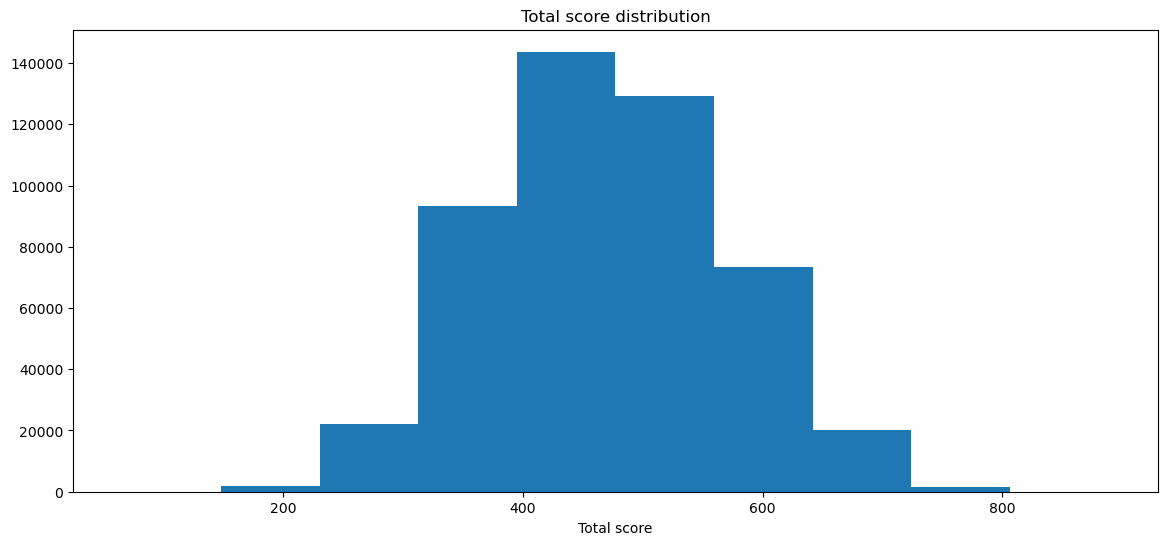

In [12]:
#Total score
plt.figure(figsize=[14, 6])
bins = np.arange(0, df['total_score'].max()+100, 100)
plt.hist(data = df, x = 'total_score')
plt.xlabel('Total score')
plt.title('Total score distribution')
plt.show()

The total score is also almost normally distributed. Next I'll have a look at the other distributions interesting for my analysis view the relationship with total score and the math score in the next step: 
- Anxiety towards mathematics
- Learning hours outside of school
- Math anxiety questions

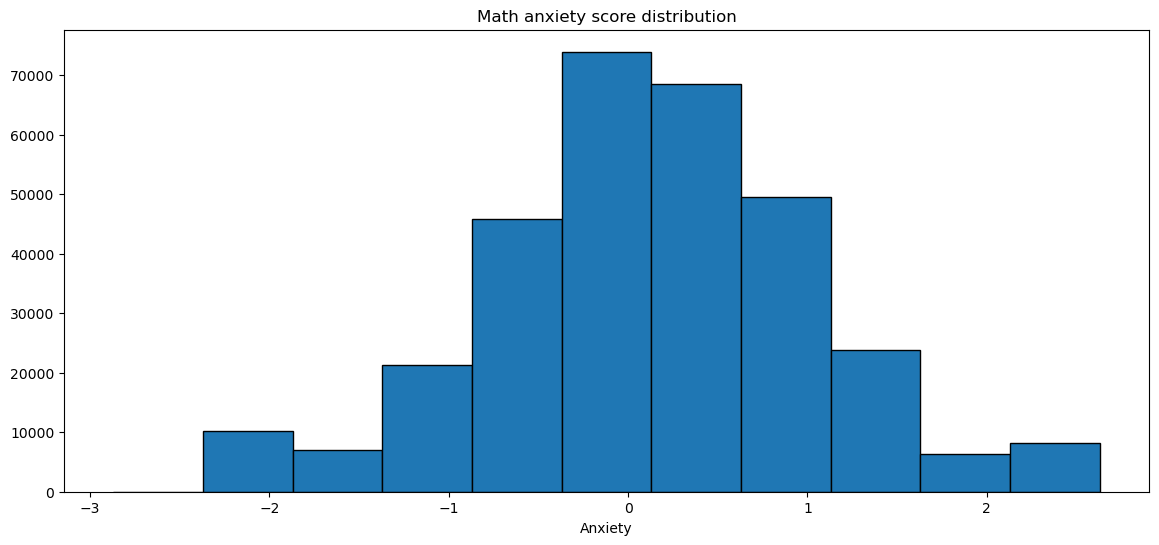

In [13]:
#Visualize math axienty score
plt.figure(figsize=[14, 6])
bins = np.arange(df['ANXMAT'].min()-0.5, df['ANXMAT'].max()+0.5, 0.5)
plt.hist(data = df, x = 'ANXMAT', bins=bins, edgecolor = 'black')
plt.xlabel('Anxiety')
plt.title('Math anxiety score distribution')
plt.show()

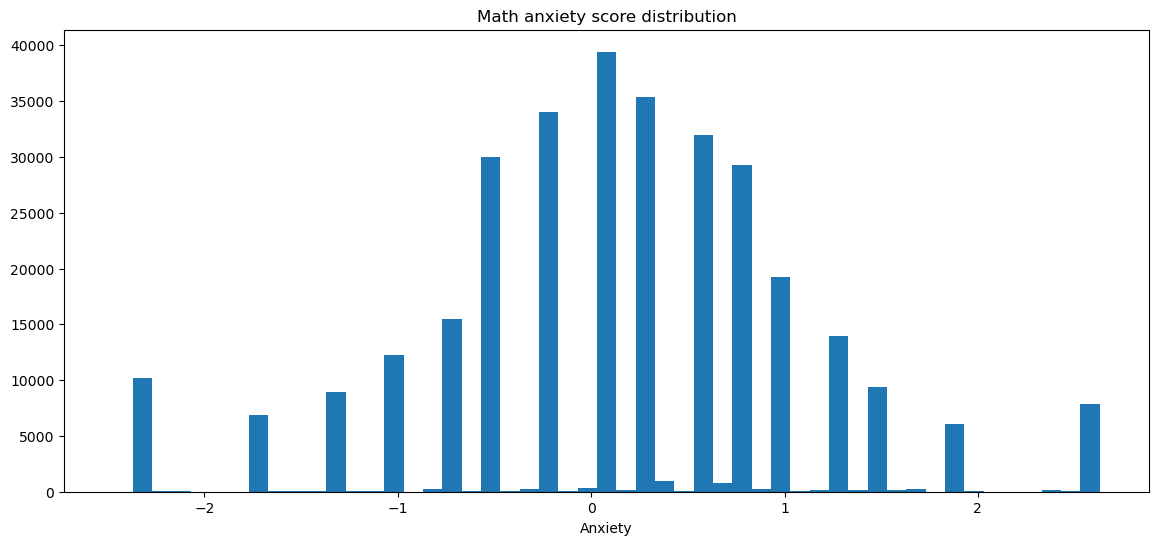

In [14]:
#Visualize with smaller bin size
plt.figure(figsize=[14,6])
bins = np.arange(df['ANXMAT'].min()-0.1, df['ANXMAT'].max()+0.1, 0.1)
plt.hist(data = df, x = 'ANXMAT', bins=bins)
plt.xlabel('Anxiety')
plt.title('Math anxiety score distribution')
plt.show()

The anxiety score is also normally distributed. 

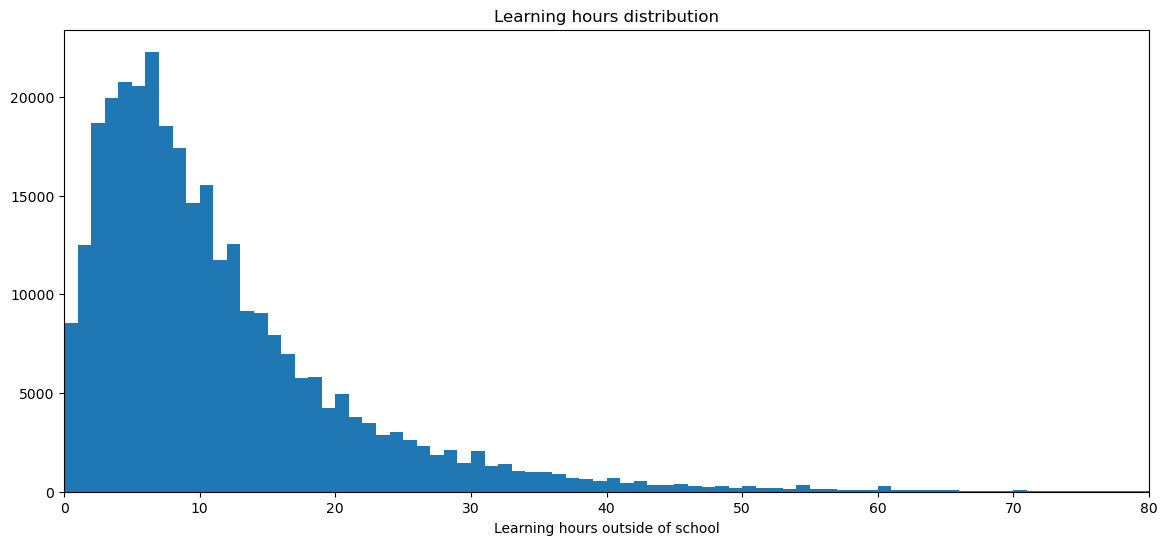

In [15]:
#Visualize learning hours outside of school on standard scale
plt.figure(figsize=[14, 6])
bins = np.arange(0, df['OUTHOURS'].max()+1, 1)
plt.hist(data = df, x = 'OUTHOURS', bins=bins)
plt.xlim([0,80])
plt.xlabel('Learning hours outside of school')
plt.title('Out-of-school learning hours distribution')
plt.show()

In [167]:
#Determine the possible limit
df.query('OUTHOURS>=80')['OUTHOURS'].sum()

42810.0

In [168]:
df.query('OUTHOURS<80')['OUTHOURS'].sum()

3386125.0

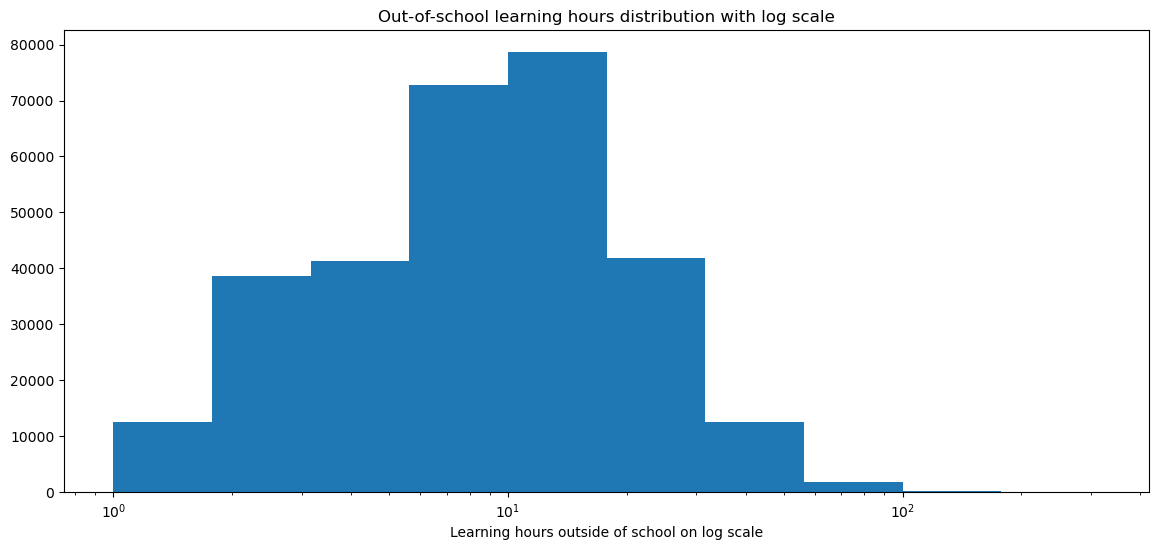

In [16]:
#Learning hours outside of school on log scale
plt.figure(figsize=[14, 6])
bins = 10 ** np.arange(0, np.log10(df['OUTHOURS'].max())+0.25, 0.25)
plt.hist(data = df, x = 'OUTHOURS', bins=bins)
plt.xscale('log')
plt.xlabel('Learning hours outside of school on log scale')
plt.title('Out-of-school learning hours distribution with log scale')
plt.show()

Outside hours has a long-tailed distribution, with a lot of students on the lower end of learning hours out of school, and few learning a lot of hours outside of school. When plotted on a log-scale, the price distribution looks normally distributed. Next I will investigate the specific survey questions related to anxiety. 



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

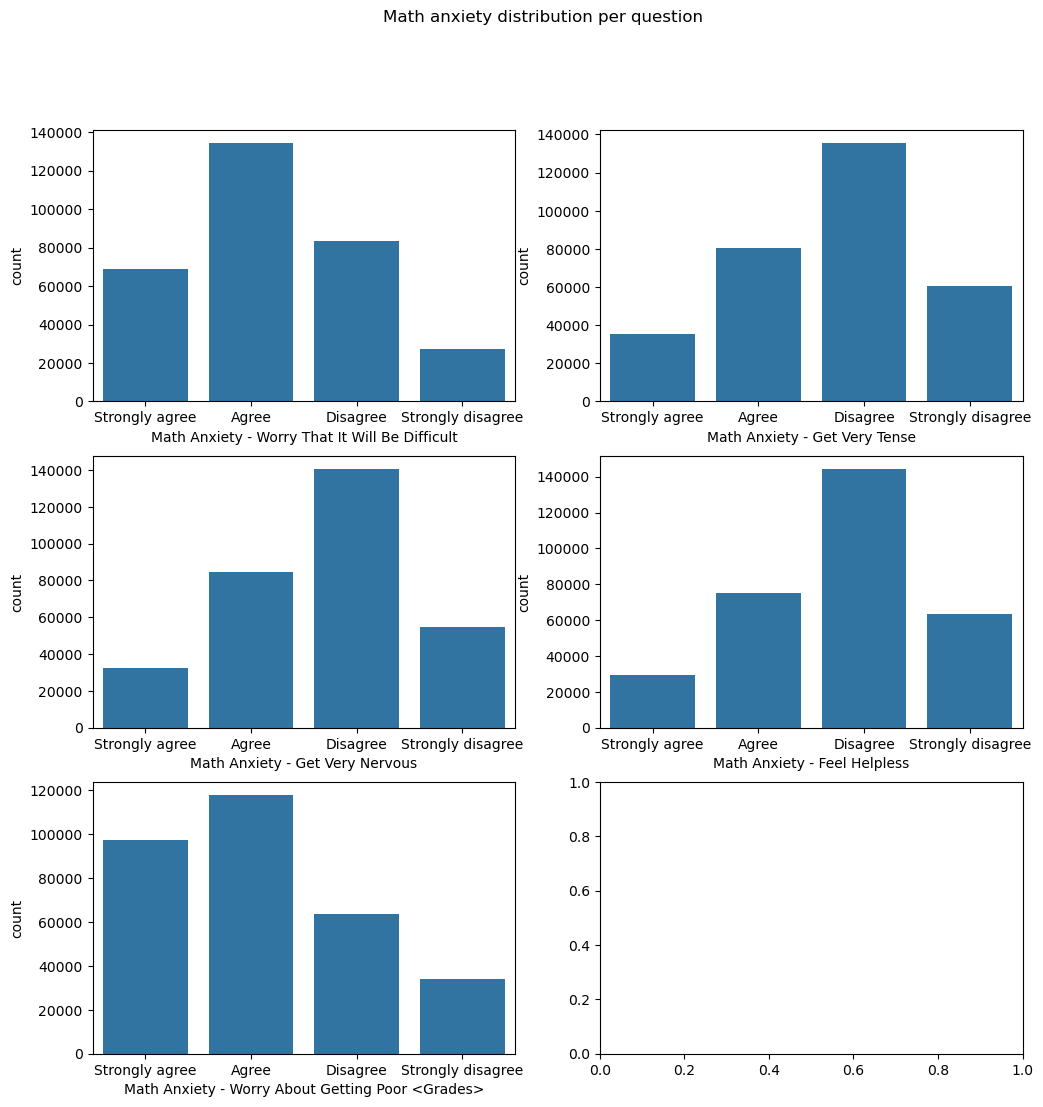

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize = [12,12])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'ST42Q01', color = default_color, ax=ax[0,0])
ax[0,0].set_xlabel('Math Anxiety - Worry That It Will Be Difficult')
sb.countplot(data = df, x = 'ST42Q03', color = default_color, ax=ax[0,1])
ax[0,1].set_xlabel('Math Anxiety - Get Very Tense')
sb.countplot(data = df, x = 'ST42Q05', color = default_color, ax=ax[1,0])
ax[1,0].set_xlabel('Math Anxiety - Get Very Nervous')
sb.countplot(data = df, x = 'ST42Q08', color = default_color, ax=ax[1,1])
ax[1,1].set_xlabel('Math Anxiety - Feel Helpless')
sb.countplot(data = df, x = 'ST42Q10', color = default_color, ax=ax[2,0])
ax[2,0].set_xlabel('Math Anxiety - Worry About Getting Poor <Grades>')

fig.suptitle('Math anxiety distribution per question')

plt.show()

Students agree and strongly agree with the questions `Worry that it will be difficult` and `Worry about getting poor grades`. Students disagree with the emotians of feeling very nervous, helpless, and getting very tense. 

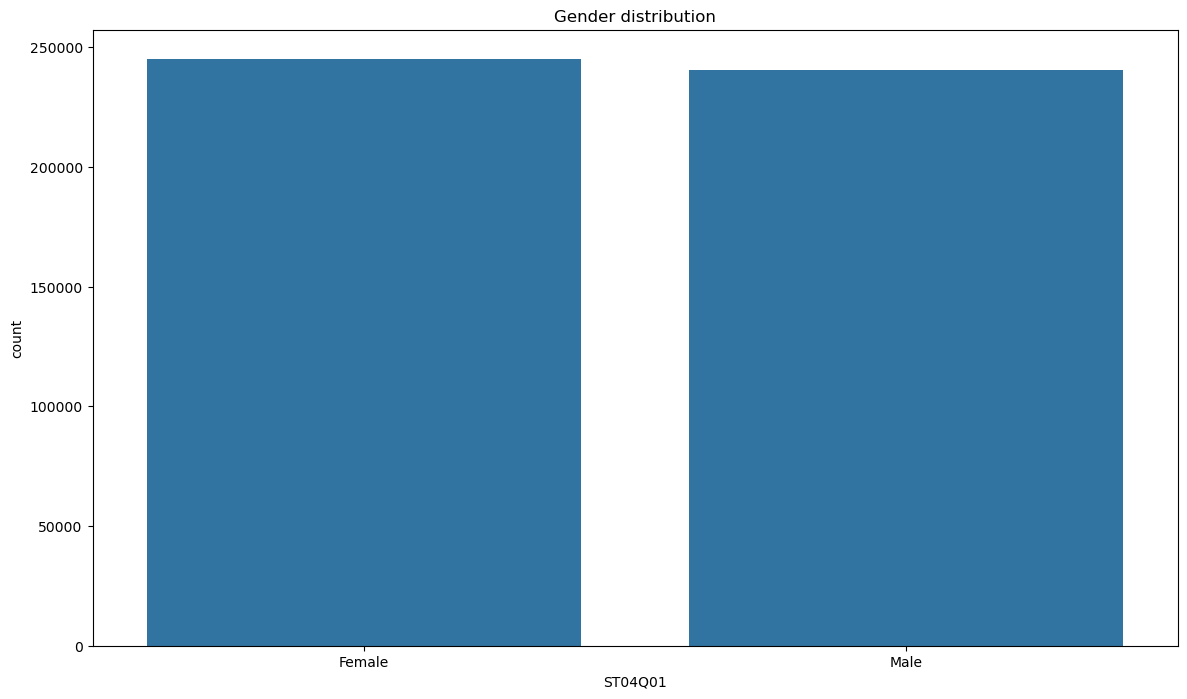

In [50]:
#Gender
plt.figure(figsize=[14, 8])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'ST04Q01', color = default_color)
plt.title('Gender distribution')

plt.show()

A little bit more female than male students participated in the study. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The first variables I have looked into in my exploration (total score, math score and anxiety score are normally distributed. The out-of-school learning hours have a long-tailed distribution to the right. When applying a log scale the distribution gets normally distributed as well. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I calculated the math score and total score per student in building the mean from the relavent values per student and added the value to the data frame in the additional columns `math_score` and `total_score`. 

## Bivariate Exploration

I am starting the bivariate exploration in having a look at the relation between the math score and the anxiety score. 

In [23]:
categoric_vars = ['ST42Q01', 'ST42Q03', 'ST42Q05', 'ST42Q08', 'ST42Q10']

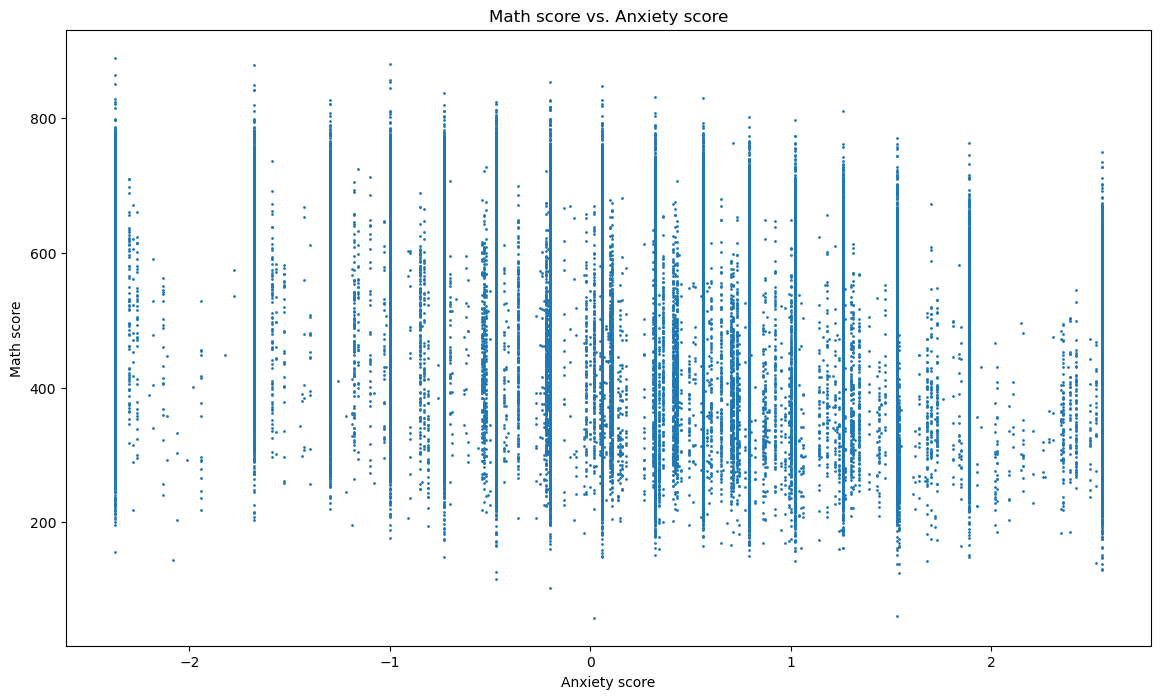

In [49]:
#Math score vs. anxiety score
plt.figure(figsize = [14, 8])
plt.scatter(data = df, x = 'ANXMAT', y = 'math_score', s = 1)
plt.xlabel('Anxiety score')
plt.ylabel('Math score')
plt.title('Math score vs. Anxiety score')
plt.show()

The visualization shows that there is only a slight correlation between math anxiety and the math score. The more anxies students feel about math they score a bit low in their total and math score. 

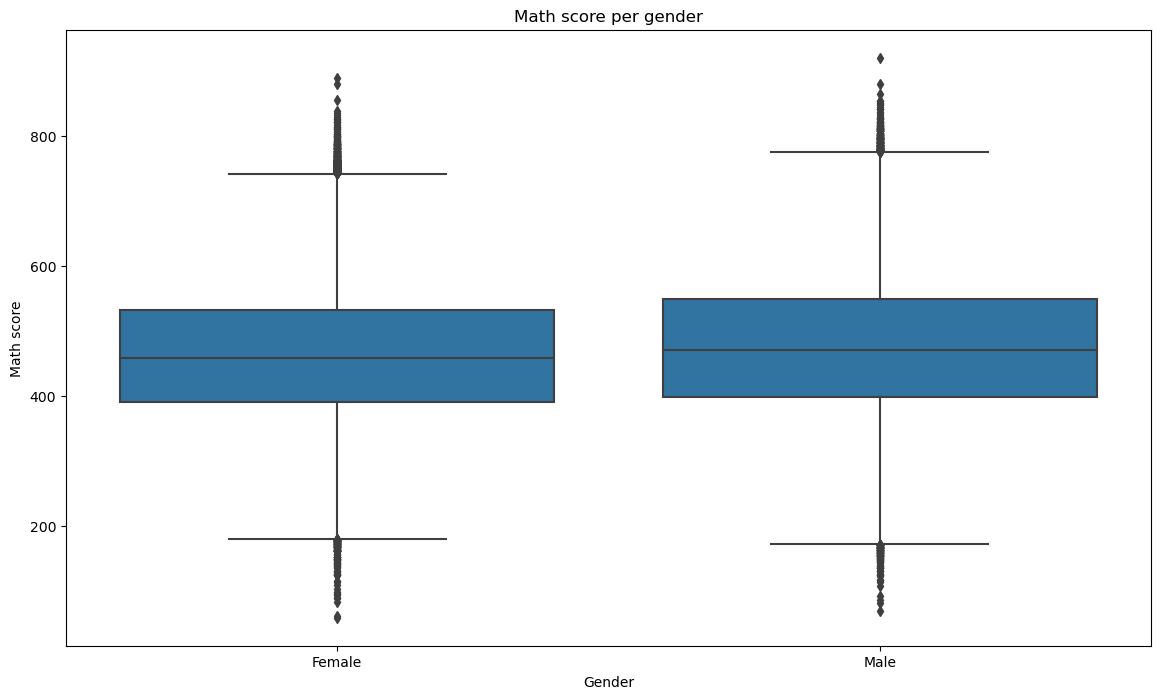

In [48]:
#Math score vs. gender

plt.figure(figsize = [14, 8])
sb.boxplot(data = df, x = 'ST04Q01', y = 'math_score',color = default_color)
plt.ylabel('Math score')
plt.xlabel('Gender')
plt.title('Math score per gender')

plt.show()

Male students are slightly scoring better in math than female students. 

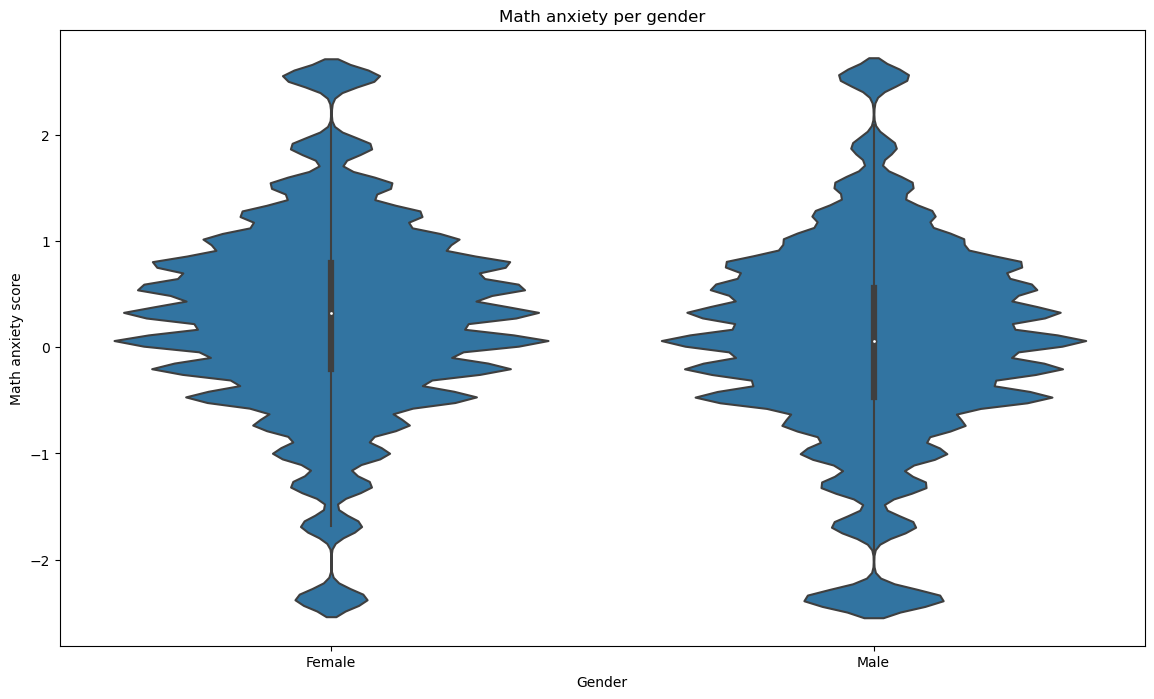

In [47]:
#Math anxiety vs. gender
plt.figure(figsize = [14, 8])
sb.violinplot(data = df, x = 'ST04Q01', y = 'ANXMAT',color = default_color)
plt.ylabel('Math anxiety score')
plt.xlabel('Gender')
plt.title('Math anxiety per gender')

plt.show()

Female students feeling more anxious about math than male students. 

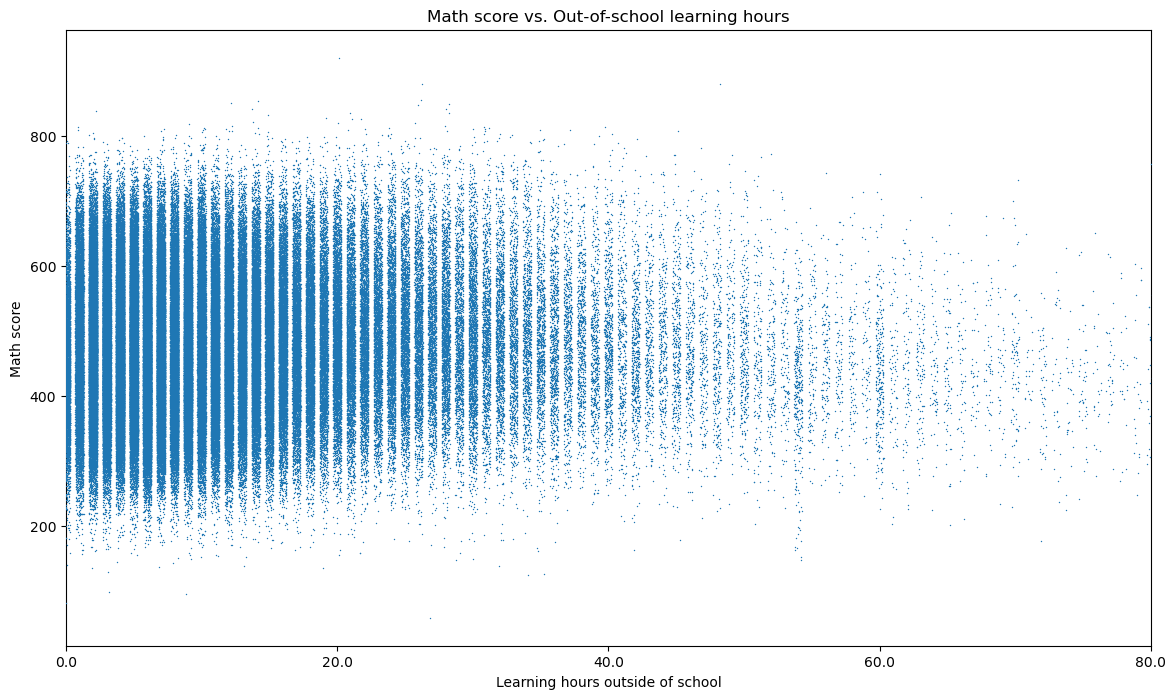

In [46]:
#Math score vs. learning hours outside of school 
plt.figure(figsize = [14, 8])
sb.stripplot(data = df, x = 'OUTHOURS', y = 'math_score', jitter=0.3, size = 1)
plt.xlim([0, 80])
plt.xlabel('Learning hours outside of school')
plt.xticks([0, 20, 40, 60, 80])
plt.ylabel('Math score')
plt.title('Math score vs. Out-of-school learning hours')
plt.show()

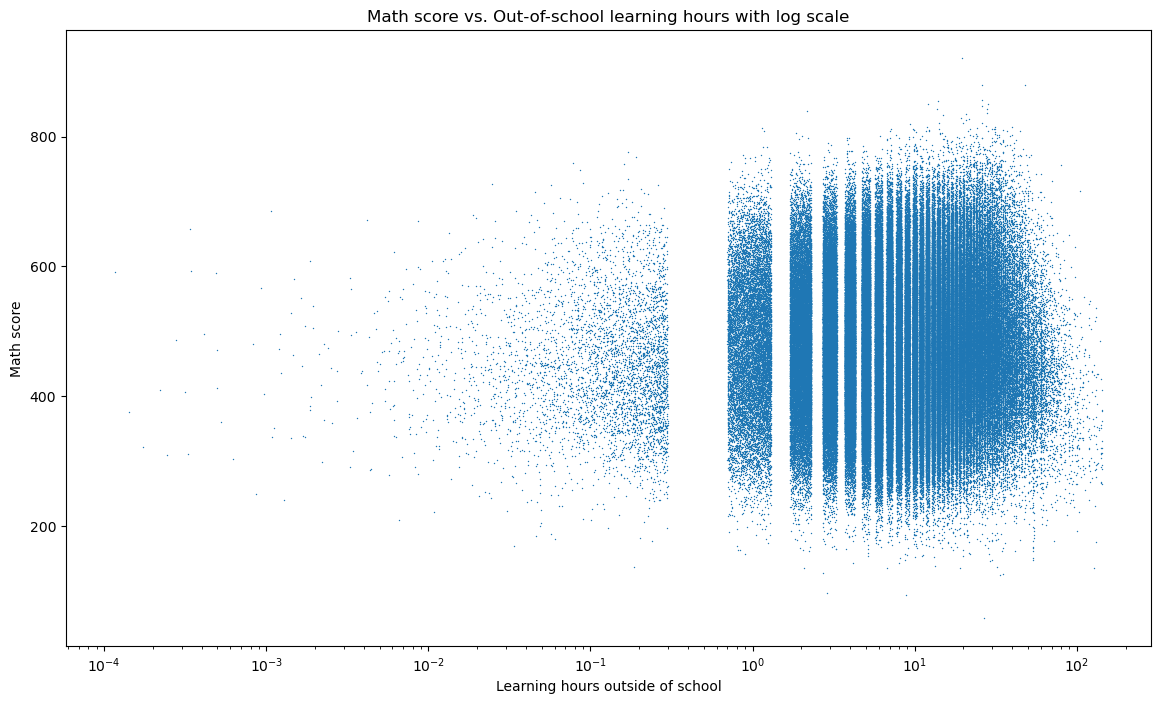

In [45]:
#Math score vs. learning hours outside of school with log scale
plt.figure(figsize = [14, 8])
sb.stripplot(data = df, x = 'OUTHOURS', y = 'math_score', jitter=0.3, size = 1)
plt.xlabel('Learning hours outside of school')
plt.xscale('log')
plt.ylabel('Math score')
plt.title('Math score vs. Out-of-school learning hours with log scale')
plt.show()

The above visualizations show not a strong correlation between more learning hours outside of school and scoring better in math. Next I will have a look at the total score vs. the out-of-school learning hours. 

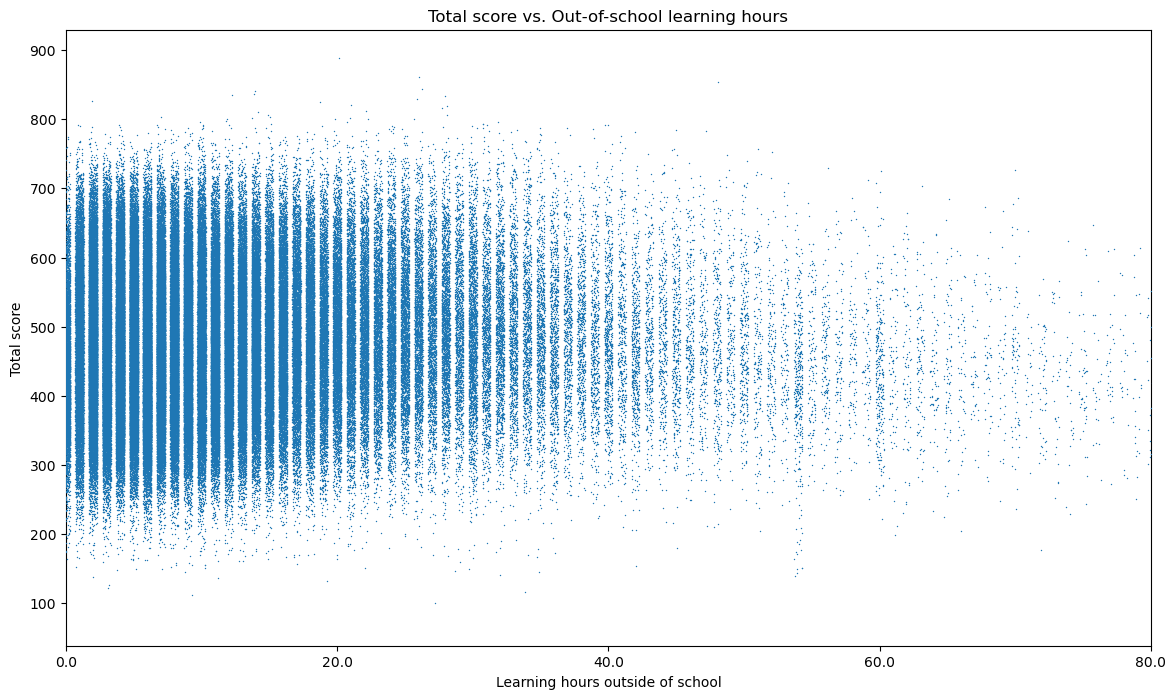

In [44]:
#Total score vs. learning hours outside of school
plt.figure(figsize = [14, 8])
sb.stripplot(data = df, x = 'OUTHOURS', y = 'total_score', size = 1, jitter=0.3)
plt.xlim([0, 80])
plt.xlabel('Learning hours outside of school')
#plt.xscale('log')
plt.xticks([0, 20, 40, 60, 80])
plt.ylabel('Total score')
plt.title('Total score vs. Out-of-school learning hours')
plt.show()

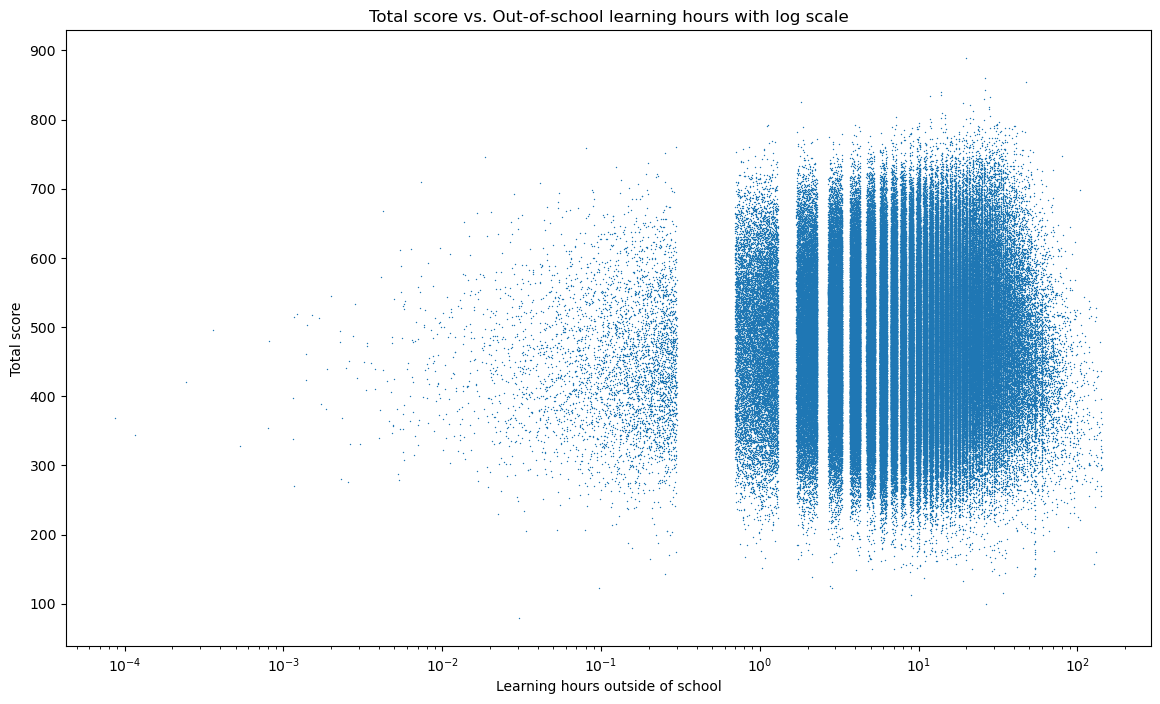

In [43]:
#Total score vs. learning hours outside of school with log scale
plt.figure(figsize = [14, 8])
sb.stripplot(data = df, x = 'OUTHOURS', y = 'total_score', size = 1, jitter=0.3)
plt.xlabel('Learning hours outside of school')
plt.xscale('log')
plt.ylabel('Total score')
plt.title('Total score vs. Out-of-school learning hours with log scale')
plt.show()

The same as for the math score in relation to the out-of-school learning hours applies. Students are not scoring better the more time they are learning outside of school. Next I will have a closer look at the relation between math score and total score since the resulting visualization above had almost the same outcome. 

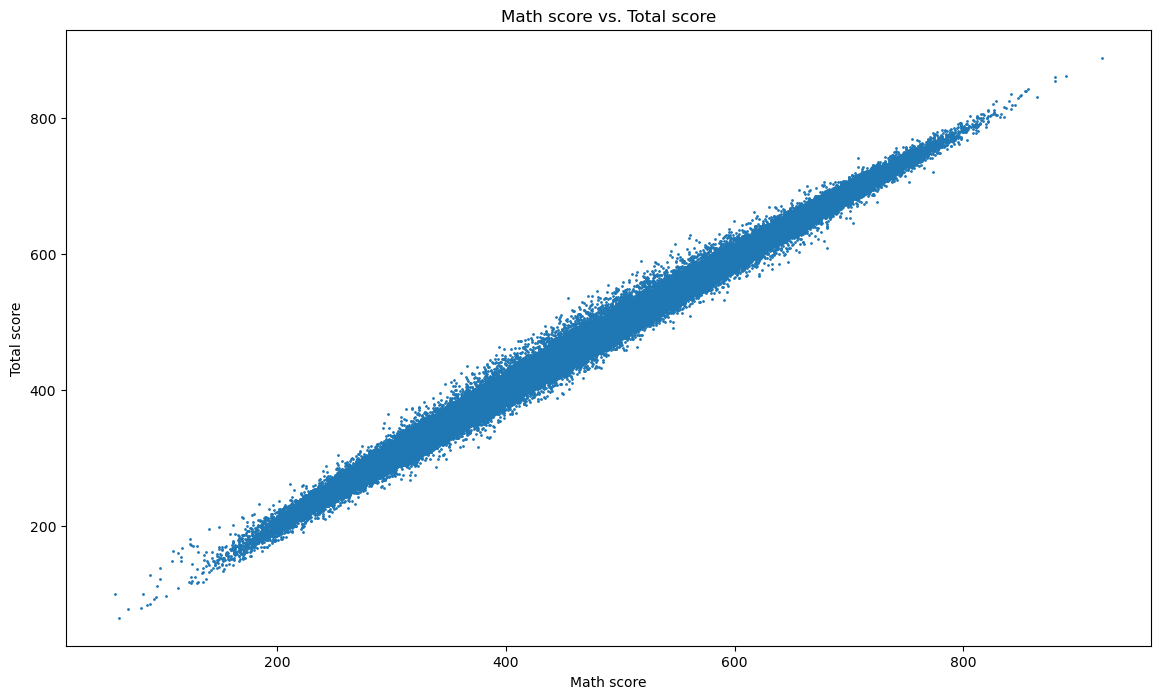

In [42]:
#Visualize Math score vs. Total score
plt.figure(figsize = [14, 8])
plt.scatter(data = df, x = 'math_score', y = 'total_score', s = 1)
plt.xlabel('Math score')
plt.ylabel('Total score')
plt.title('Math score vs. Total score')
plt.show()

The relationship between math and total score is linear. Students score in the same range in math as they score in total. The last visualization in the bivariable section is looking at the math anxiety survey questions in relation to the math score. 

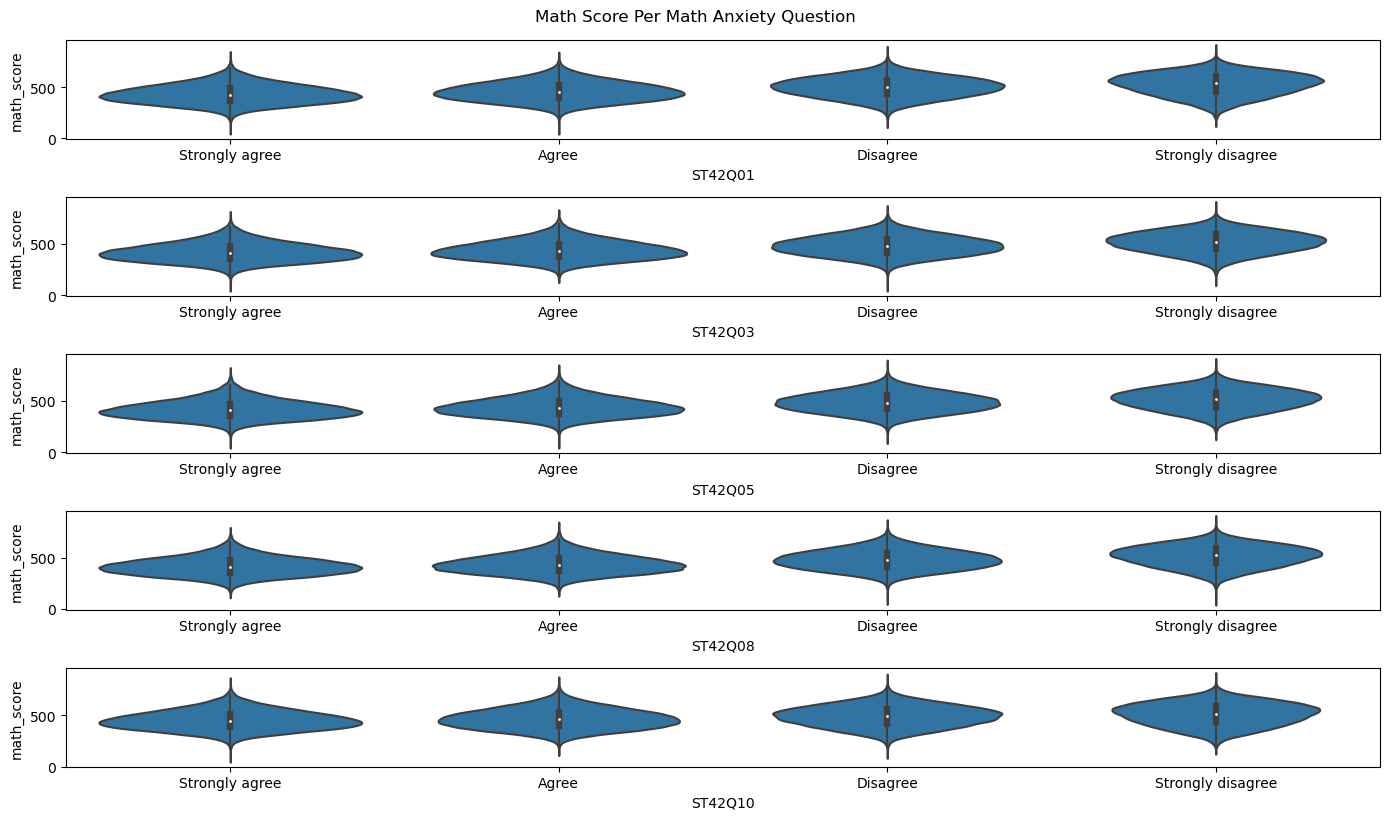

In [52]:
#Visualize math anxiety qestions vs. math score
fig, ax = plt.subplots(nrows = 5, figsize = [14,8])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = df, x = var, y = 'math_score', ax = ax[i],
               color = default_color)
    plt.tight_layout()

fig.suptitle('Math score per math anxiety question'.title(), y=1.02)
plt.show();

And the visualizations show a strong relation between anxiety and the math score. The more students disagree with questions the better they score in math.
- Worry That It Will Be Difficult
- Get Very Tense
- Get Very Nervous
- Feel Helpless
- Worry About Getting Poor Grades

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The more anxious students feel the lower they score in their math score. There is also a correlation between anxiety and gender. Female students feel more anxious towards math than male students.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Math score and total score are linear to each other. Students are scoring on the same level in math and in total.  Students that learn more hours outside of school do not score better in math or in total, so there is no strong correlation between out-of-school learning hours. 

## Multivariate Exploration

I am starting the multivariate exploration with a plot matrix of math score, total score, anxiety score and out-of-school learning hours. 

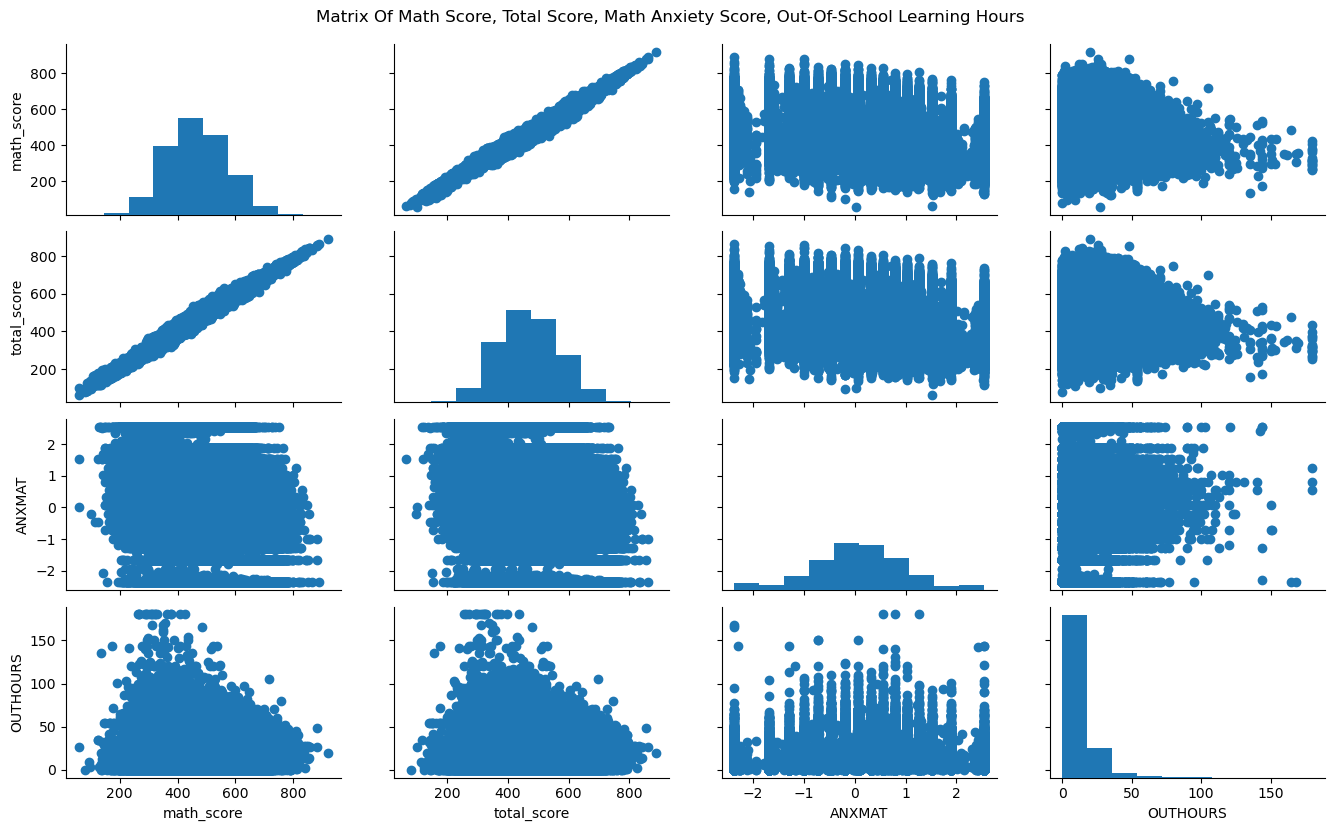

In [57]:
#Plot matrices of the numeric varibales Math score, Total score, Anxienty score and Learning hours outside of school
numeric_var = ['math_score', 'total_score', 'ANXMAT', 'OUTHOURS']

g = sb.PairGrid(data = df, vars = numeric_var)
g.fig.set_size_inches(14, 8);
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

plt.suptitle('Matrix of Math score, Total score, Math Anxiety score, Out-of-school learning hours'.title(), y=1.02);

There are no new findings which I have not already found in the bivariable exploration. Next I will have a look at the relation between total score and math score for two of the survey questions related to math anxiety. 

In [62]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(df['math_score'].min()//100, df['math_score'].max()+100, 100)
    bins_y = np.arange(df['total_score'].min()//100, df['total_score'].max()+100, 100)
    plt.hist2d(x, y, cmap = palette, bins=[bins_x, bins_y], cmin = 0.5)

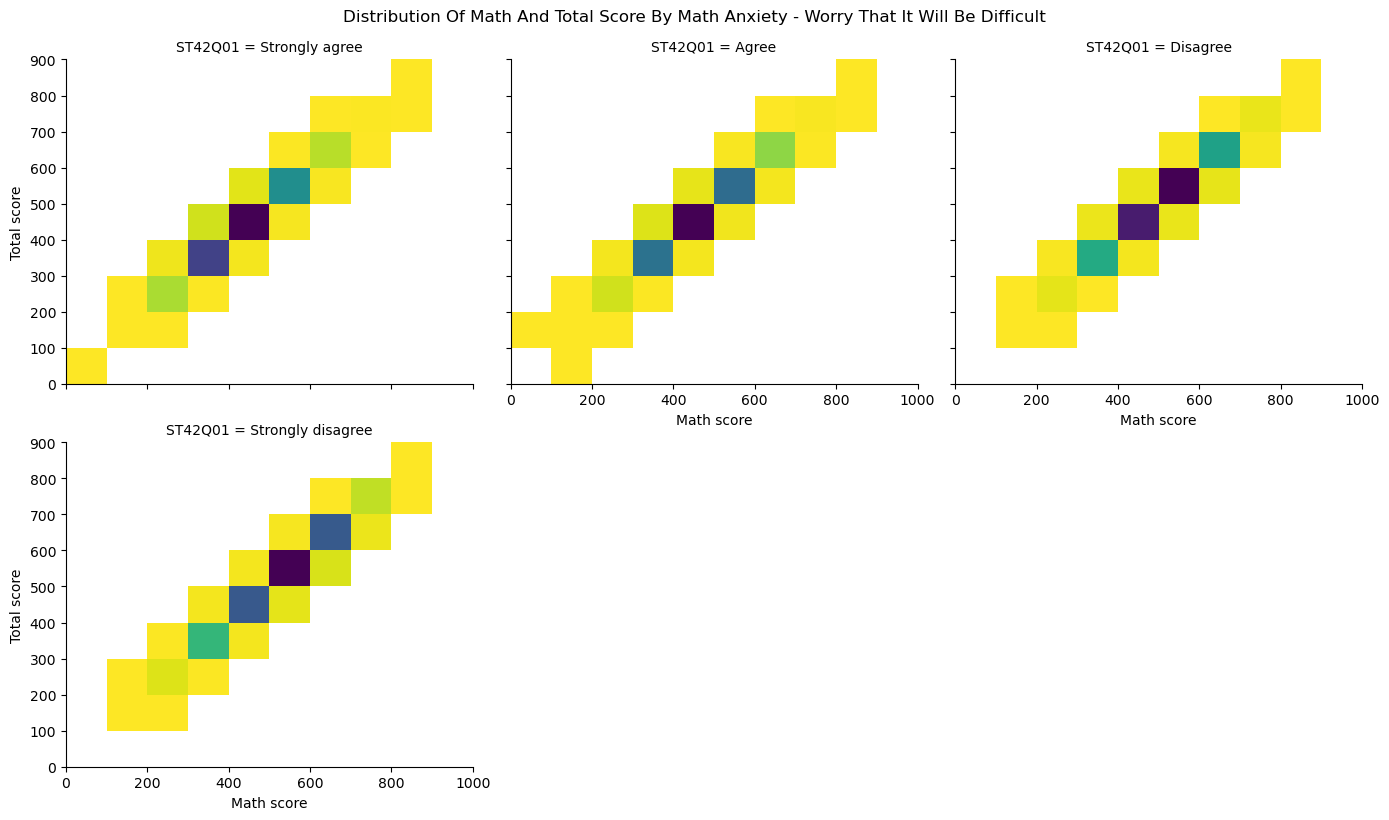

In [63]:
#Visualization for question `Worry That It Will Be Difficult`
g = sb.FacetGrid(data = df, col = 'ST42Q01', col_wrap = 3, height = 3)
g.fig.set_size_inches(14, 8);
g.map(hist2dgrid, 'math_score', 'total_score', color = 'viridis_r')
g.set_xlabels('Math score')
g.set_ylabels('Total score')

plt.suptitle('Distribution of math and total score by math anxiety - Worry That It Will Be Difficult'.title(), y = 1.02)


plt.show()

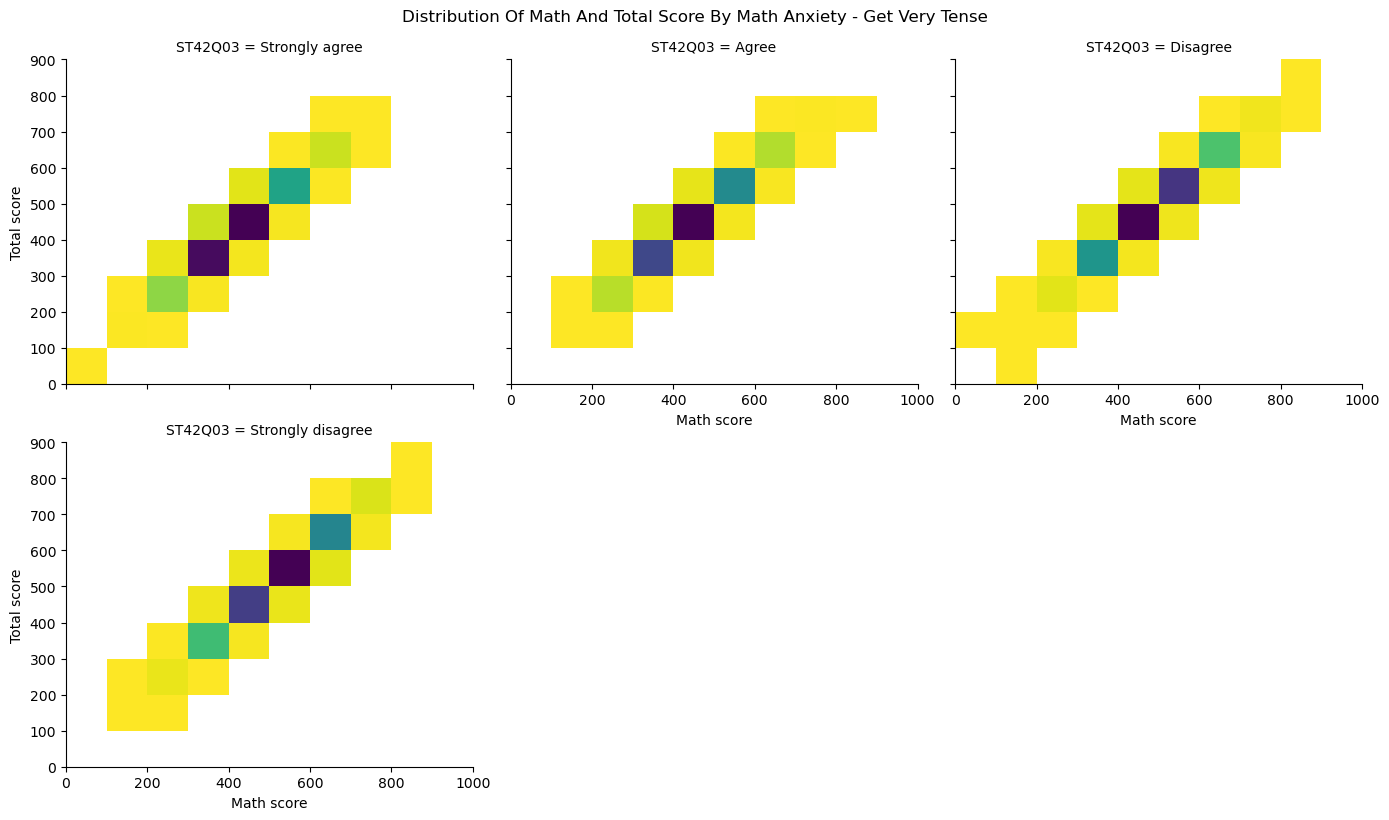

In [64]:
#Visualization for question `Get very tense`
g = sb.FacetGrid(data = df, col = 'ST42Q03', col_wrap = 3, height = 3)
g.fig.set_size_inches(14, 8);
g.map(hist2dgrid, 'math_score', 'total_score', color = 'viridis_r')
g.set_xlabels('Math score')
g.set_ylabels('Total score')

plt.suptitle('Distribution of math and total score by math anxiety - Get very tense'.title(), y = 1.02)

plt.show()

The more students agree to questions related to math anxiety they are more likely to score lower in their math and total score. Next up is the relation between math score, total score and anxiety score. 

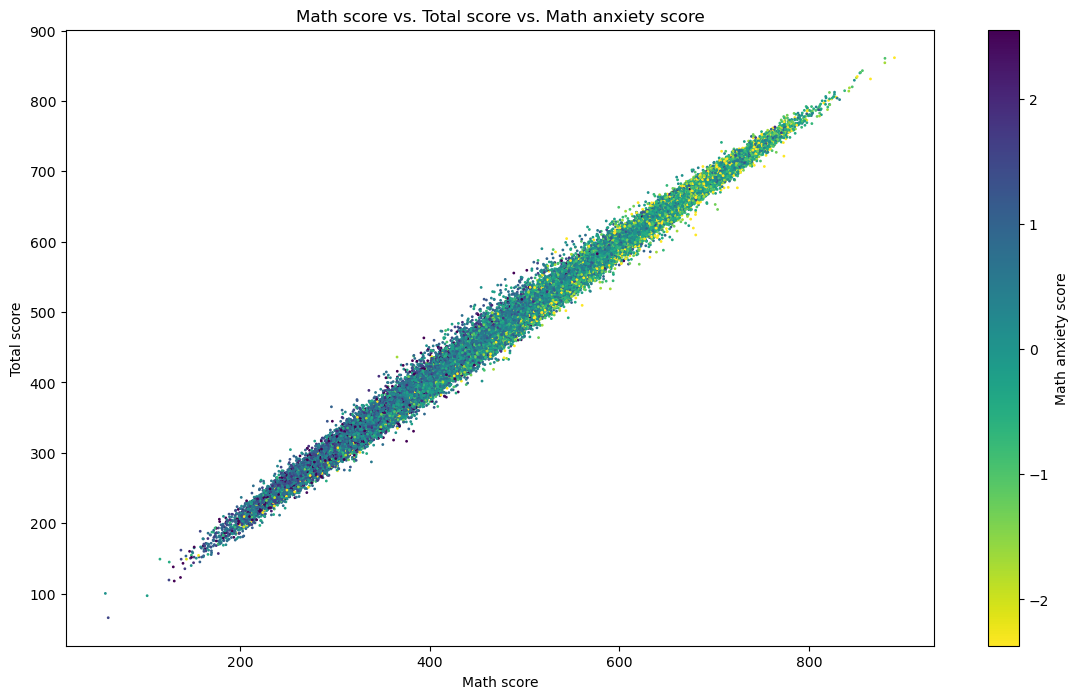

In [61]:
#Anxiety in relation to math and total score
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [14, 8]);

plt.scatter(data = df, x = 'math_score', y = 'total_score', c = 'ANXMAT', s= 1, cmap = 'viridis_r')
plt.colorbar(label ='Math anxiety score')
plt.xlabel('Math score')
plt.ylabel('Total score')
plt.title('Math score vs. Total score vs. Math anxiety score');

There is a trend in scoring higher the less anxious students feel but not that clear just from this type of visualization. Next exploration is the relation between math score, out-of-school learning hours and the math anxiety score. 

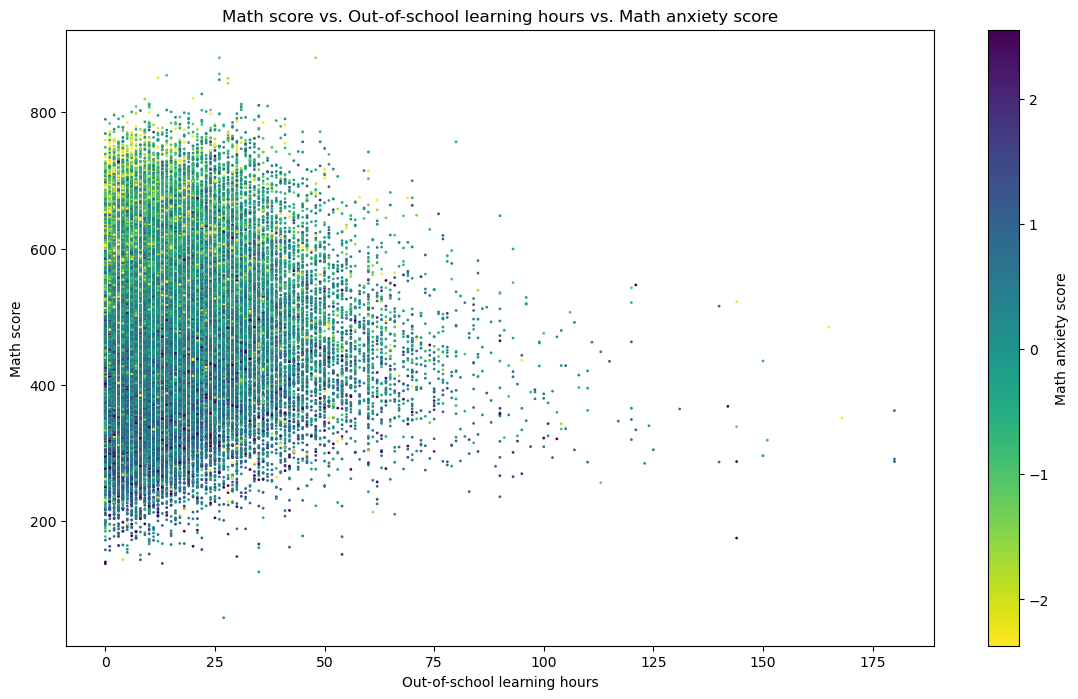

In [65]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [14, 8]);
plt.scatter(data = df, x = 'OUTHOURS', y = 'math_score', c = 'ANXMAT', s= 1,
               cmap = 'viridis_r')
plt.colorbar(label ='Math anxiety score')
plt.xlabel('Out-of-school learning hours')
plt.ylabel('Math score')
plt.title('Math score vs. Out-of-school learning hours vs. Math anxiety score');

In this visualization is a tendency visible that students that feel less anxious about math score higher in math. But even though some spent a lot of out-of-school learning hours they did not necessarily score higher in math. That is why I am looking into the correlation coefficients in the next visualization. 

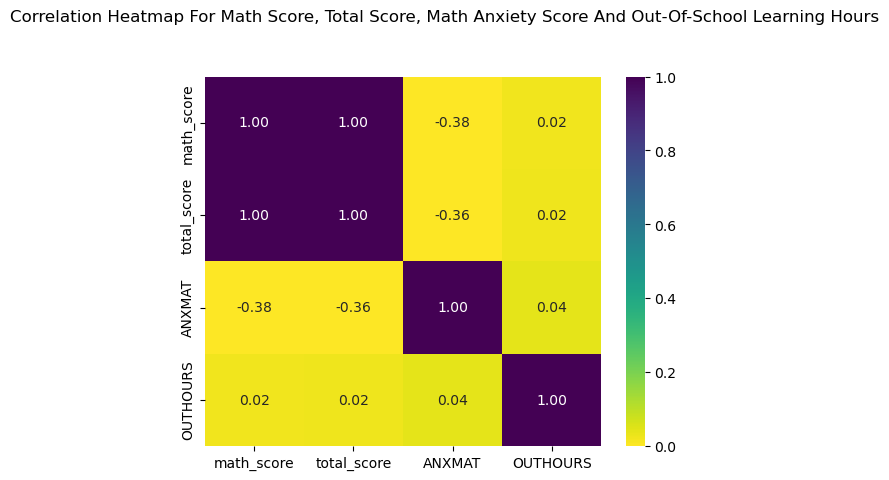

In [67]:
#Correlation heatmap for numeric variables Math score, Total score, Anxienty score and Learning hours outside of school
fig.set_size_inches(14, 8);
sb.heatmap(df[numeric_var].corr(), cmap = 'viridis_r', annot = True,
          fmt = '.2f', vmin = 0)
plt.suptitle('Correlation heatmap for Math score, Total score, Math anxiety score and Out-of-school learning hours'.title(), y = 1.02);

There is a strong linear correlation between total score and the math score. There is no correlation between learning hours outside of school and math and total score as well as the anxiety score towards math. There is a negative correlation of -0.36 and -0.38 between anxiety towards math and the total and math score. As a result I will not further look into the variable learning hours outside of school. Next I will explore the influence of gender on the math score and the anxiety score. 

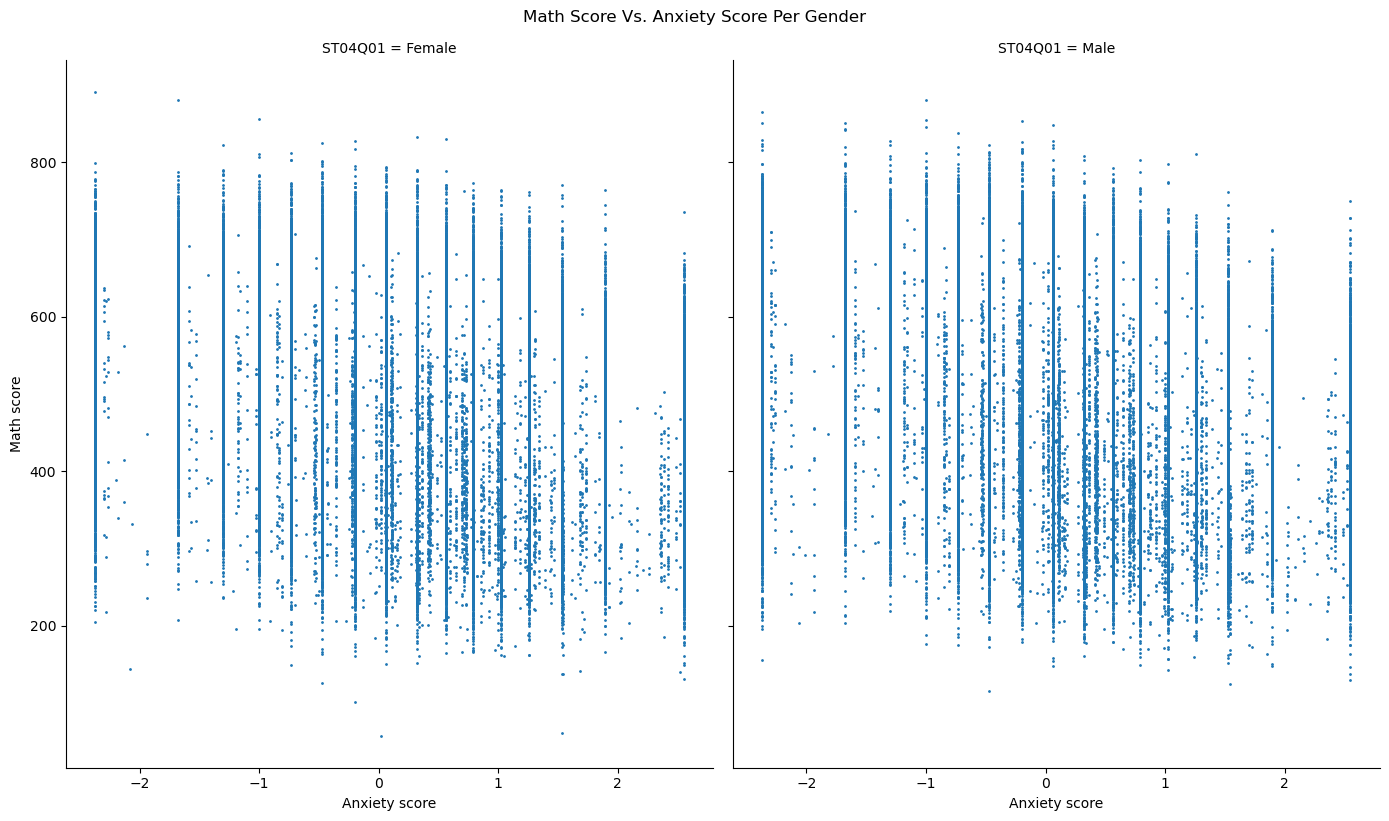

In [71]:
#Math anxienty score vs. math score per gender
g = sb.FacetGrid(data = df, col = 'ST04Q01')
g.fig.set_size_inches(14, 8);
g.map(plt.scatter, 'ANXMAT','math_score',  s=1)
g.set_xlabels('Anxiety score')
g.set_ylabels('Math score')

plt.suptitle('Math score vs. Anxiety score per gender'.title(), y = 1.02);

plt.show()

Also here you can see that female and male students have the same pattern. The more anxious they feel about math the lower they score in math but the visualization is not the best to see the difference. 

/Users/tanja/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


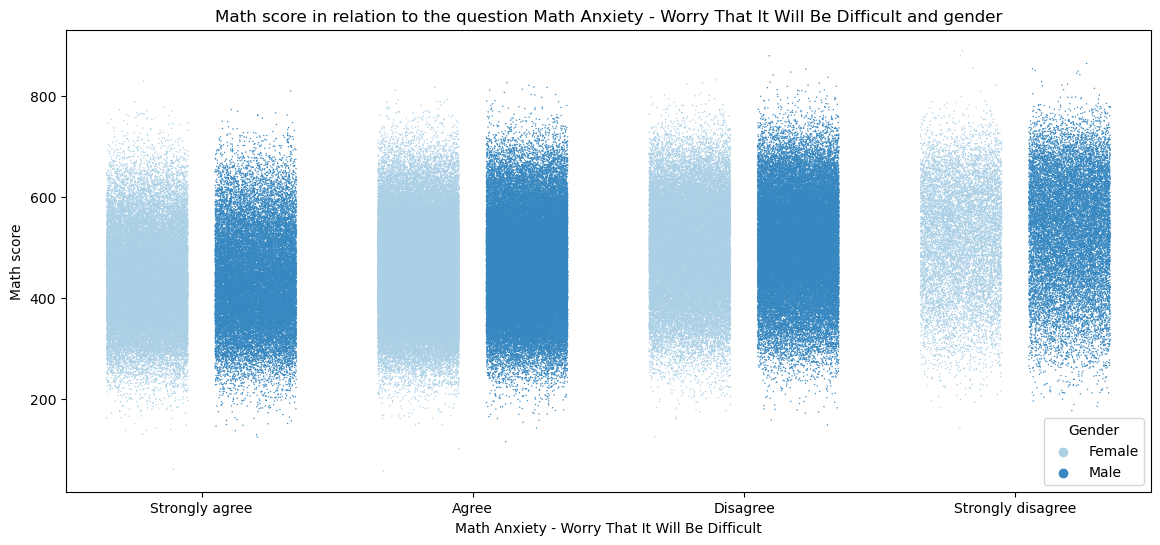

In [252]:
# Math score in relation to the question Math Anxiety - Worry That It Will Be Difficult and gender'
fig = plt.figure(figsize = [14,6])
ax = sb.stripplot(data = df, x = 'ST42Q01', y = 'math_score', hue = 'ST04Q01',
           palette = 'Blues', size = 1, jitter = 0.3, dodge = True)
plt.title('Math score in relation to the question Math Anxiety - Worry That It Will Be Difficult and gender')
plt.legend(title ='Gender')
plt.ylabel('Math score')
plt.xlabel('Math Anxiety - Worry That It Will Be Difficult')

plt.show();

This visualization shows the answers to the question `Worry That It Will Be Difficult` in relation to the math score. In the visualization one can see the more students disagree with the survey question they score higher in math. There is also a difference between gender. Male students score higher than female students for each answer. The only exception is for `Strongly disagree` where female students have a higher math score than the male students.  

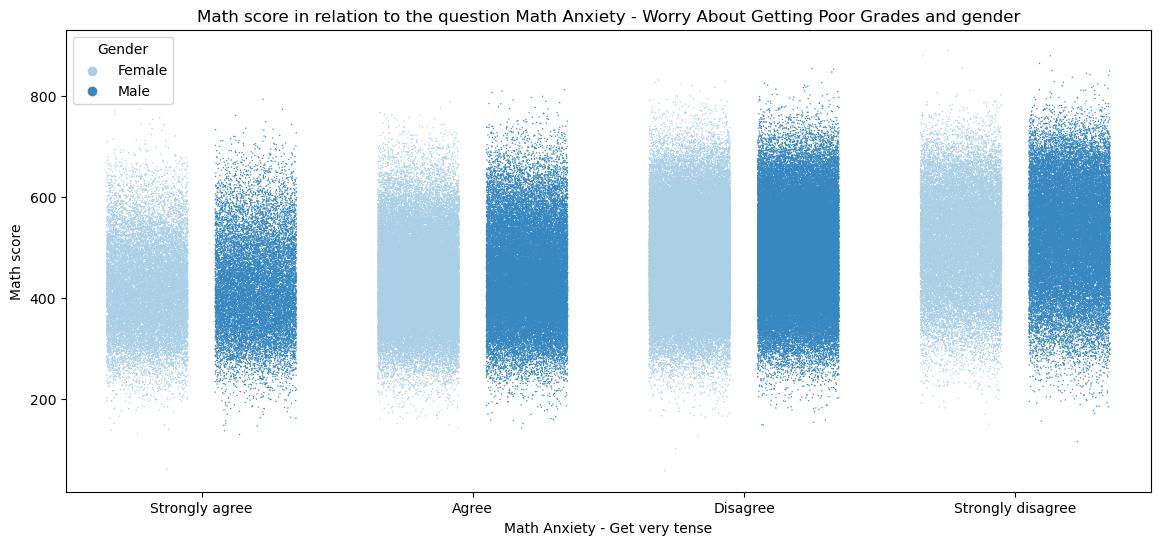

In [253]:
# Math score in relation to the question Math Anxiety - Get very tense and gender
fig = plt.figure(figsize = [14,6])
ax = sb.stripplot(data = df, x = 'ST42Q03', y = 'math_score', hue = 'ST04Q01',
           palette = 'Blues', size = 1, jitter = 0.3, dodge = True)
plt.title('Math score in relation to the question Math Anxiety - Worry About Getting Poor Grades and gender')
plt.legend(title ='Gender')
plt.ylabel('Math score')
plt.xlabel('Math Anxiety - Get very tense')

plt.show();

This visualization shows the answers to the question `Get very tense` in relation to the math score. In the visualization one can see the more students disagree with the survey question they score higher in math. There is also a difference between gender. Male students score higher than female students for each answer. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Female students score lower in math and they also feel more anxious about math. Male students score higher in math and they feel less anxious about math. Out-of-school learning hours do not have a strong influence on the math or total score. 

### Were there any interesting or surprising interactions between features?

Surpising for me was that the math score and total score have such a strong correlation and that math anxiety has an influence on the total score are well. I expected that there would be some students that are scoring very good in math but might score less in the other categories leading to a lower total score. 

## Conclusions
There is a strong relation between feeling anxious about math and scoring low in math or in total. The more students disagree with questions of the survey about math anxiety the better they scored in math. Female students feel more anxious about math than male students. 
Surprisingly out-of-school learning hours do not have an influence on the math or total score. Some students score on a high level with high numbers of out-of-school learning hours but there are also students that learn a lot of hours outside of school but still do not score on a high level. 